## OBJECTIVE

### Q1. What is the overall sales trend? 
### Q2. Which are the Top 3 products by sales?
### Q3. Which are the Most Selling Products?
### Q4. Which is the most preferred payment method?
### Q5. Which one is the best branch according to the total sales?

<h4> IMPORTING REQUIRED LIBRARIES

In [2]:
# Data Manipulation
import pandas as pd

# Data Visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

<h4> IMPORTING THE DATASET

In [4]:
df = pd.read_csv('/Users/stefanmanderson/python_project/sales_analysis/supermarket_sales - Sheet1.csv')

<h4> DATA AUDIT

In [5]:
# First five rows
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [6]:
# Last five rows
df.tail()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1
999,849-09-3807,A,Yangon,Member,Female,Fashion accessories,88.34,7,30.9190,649.2990,2/18/2019,13:28,Cash,618.38,4.761905,30.9190,6.6


In [7]:
# Shape of dataset
df.shape

(1000, 17)

In [11]:
# columns name
df.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

In [15]:
# Changing the columns name
df = df.rename(columns={'Invoice ID': 'invoice_id', 
                        'Customer type': 'customer_type',
                       'Branch': 'branch',
                       'City': 'city',
                       'Gender': 'gender',
                       'Product line': 'product_line',
                       'Unit price': 'unit_price',
                       'Quantity': 'quantity',
                       'Tax 5%': 'tax_5p',
                       'Total': 'total',
                       'Date': 'date',
                       'Time': 'time',
                       'Payment': 'payment',
                       'gross margin percentage': 'gross_margin_percentage',
                       'gross income': 'gross_income',
                       'Rating': 'rating'})

In [17]:
# Summary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   invoice_id               1000 non-null   object 
 1   branch                   1000 non-null   object 
 2   city                     1000 non-null   object 
 3   customer_type            1000 non-null   object 
 4   gender                   1000 non-null   object 
 5   product_line             1000 non-null   object 
 6   unit_price               1000 non-null   float64
 7   quantity                 1000 non-null   int64  
 8   tax_5p                   1000 non-null   float64
 9   total                    1000 non-null   float64
 10  date                     1000 non-null   object 
 11  time                     1000 non-null   object 
 12  payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross_margin_percentage  

In [22]:
# Changing the date (object) to datetime
df['date'] = df['date'].astype('datetime64[ns]')

In [23]:
# Checking missing values
df.isnull().sum()

invoice_id                 0
branch                     0
city                       0
customer_type              0
gender                     0
product_line               0
unit_price                 0
quantity                   0
tax_5p                     0
total                      0
date                       0
time                       0
payment                    0
cogs                       0
gross_margin_percentage    0
gross_income               0
rating                     0
dtype: int64

In [25]:
# Getting the descriptive statistic summary
df.describe()

,unit_price,quantity,tax_5p,total,cogs,gross_margin_percentage,gross_income,rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.220360e-14,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000


___

<h3> Question 1 : What is the overall sales trend?

In [26]:
df['date'].min()

Timestamp('2019-01-01 00:00:00')

In [27]:
df['date'].max()

Timestamp('2019-03-30 00:00:00')

In [31]:
# Change date to month
df['month'] = df['date'].apply(lambda x: x.strftime('%Y-%m'))

In [33]:
# Check cumulative sales groupby month
df.groupby('month').sum()

,unit_price,quantity,tax_5p,total,cogs,gross_margin_percentage,gross_income,rating
month,,,,,,,,
2019-01,19753.89,1965,5537.708,116291.868,110754.16,1676.190476,5537.708,2470.2
2019-02,17159.52,1654,4629.494,97219.374,92589.88,1442.857143,4629.494,2142.6
2019-03,18758.72,1891,5212.167,109455.507,104243.34,1642.857143,5212.167,2359.9


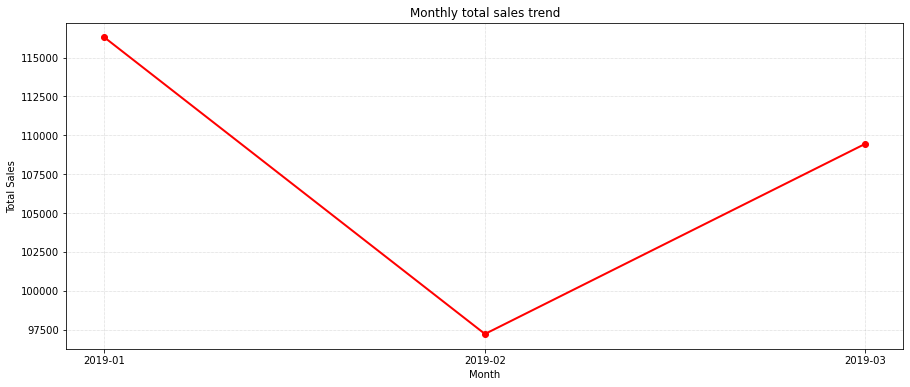

In [45]:
# Trend
df_trend = pd.DataFrame(df.groupby('month').sum()['total'].reset_index())
# Setting figure size
plt.figure(figsize=(15,6))

# Data visualization
plt.plot(df_trend['month'], df_trend['total'], marker='o', linewidth=2, color='red')
plt.title('Monthly total sales trend')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
plt.show();

<h4> Question 2 : Which are the Top 3 products by sales?

In [58]:
df_top_three = df.groupby('product_line').sum()['total'].reset_index()

In [59]:
df_top_three = df_top_three.sort_values('total', ascending=False)

In [61]:
# Taking top 3 product base on total sales
df_top_three[0:3]

,product_line,total
2,Food and beverages,56144.8440
5,Sports and travel,55122.8265
0,Electronic accessories,54337.5315


<h4> Question 3 : Which are the Most Selling Products?

In [63]:
df_top_quantity = df.groupby('product_line').sum()['quantity'].reset_index()

In [64]:
# Sorting from highest quantity to the lowest quantity
df_top_quantity = df_top_quantity.sort_values('product_line', ascending=False)

In [71]:
# Taking the most selling product
df_top_quantity[:1]

,product_line,quantity
5,Sports and travel,920


<h4> Question 4 : Which is the most preferred payment method?

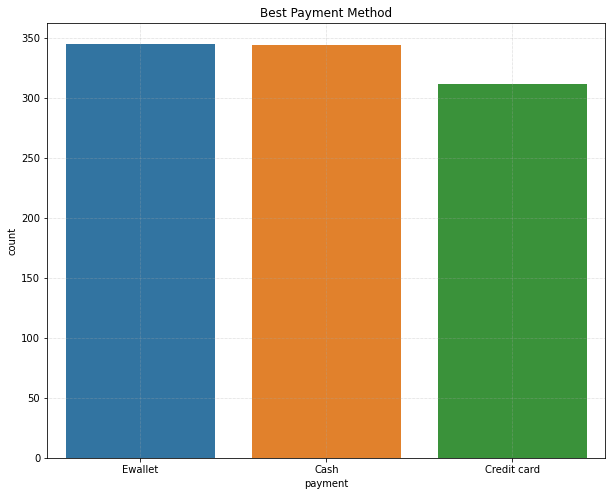

In [88]:
# Set the figure size
plt.figure(figsize=(10, 8))

# Data visualization
plt.title('Best Payment Method')
sns.countplot(df['payment'])
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)

In [86]:
# Count how many Ewallet, cash payment, and credit card use for payment
ewallet = df['payment'].str.count('Ewallet').sum()
print('Ewallet: '+ str(ewallet))

cash_payment = df['payment'].str.count('Cash').sum()
print('Cash payment: ' + str(cash_payment))

credit_card = df['payment'].str.count('Credit card').sum()
print('Credit card: ' + str(credit_card))

Ewallet: 345
Cash payment: 344
Credit card: 311


<h4> Question 5 : Which one is the best branch according to the total sales?

In [89]:
df_branch = df.groupby('branch').sum()['total'].reset_index()

In [91]:
df_branch = df_branch.sort_values('total', ascending=False)

In [92]:
df_branch[:1]

,branch,total
2,C,110568.7065
